In [2]:
from typing import no_type_check_decorator
import random
import time
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
class TreapNode:
    def __init__(self, key, value=None, height=1, priority=None):
        self.key = key
        self.value = value
        self.height = height
        self.priority = priority if priority else random.randint(1, 100)
        self.left = self.right = None

class TreapTree:
    def __init__(self):
        self.root = None

    def rotate_right(self, node):
        left_node = node.left
        node.left = left_node.right
        left_node.right = node
        node.height = max(self.get_height(node.left), self.get_height(node.right)) + 1
        left_node.height = max(self.get_height(left_node.left), self.get_height(left_node.right)) + 1
        return left_node

    def get_height(self, root):
        return root.height if root else 0

    def rotate_left(self, node):
        right_node = node.right
        node.right = right_node.left
        right_node.left = node
        node.height = max(self.get_height(node.left), self.get_height(node.right)) + 1
        right_node.height = max(self.get_height(right_node.left), self.get_height(right_node.right)) + 1
        return right_node

    def insert_node(self, node, key, value):
        if not node:
            return TreapNode(key, value)
        if key < node.key:
            node.left = self.insert_node(node.left, key, value)
            if node.left.priority > node.priority:
                node = self.rotate_right(node)
        else:
            node.right = self.insert_node(node.right, key, value)
            if node.right.priority > node.priority:
                node = self.rotate_left(node)
        return node

    def insert(self, key, value):
        self.root = self.insert_node(self.root, key, value)

    def delete_node(self, node, key):
        if not node:
            return node
        if key < node.key:
            node.left = self.delete_node(node.left, key)
        elif key > node.key:
            node.right = self.delete_node(node.right, key)
        else:
            if not node.left:
                return node.right
            elif not node.right:
                return node.left
            if node.left.priority < node.right.priority:
                node = self.rotate_left(node)
                node.left = self.delete_node(node.left, key)
            else:
                node = self.rotate_right(node)
                node.right = self.delete_node(node.right, key)
        return node

    def delete(self, key):
        self.root = self.delete_node(self.root, key)

    def find_node(self, node, key):
        if not node or node.key == key:
            return node
        if node.key < key:
            return self.find_node(node.right, key)
        return self.find_node(node.left, key)

    def find(self, key):
        node = self.find_node(self.root, key)
        return node.value if node else None

    def pre_order(self, node):
        if node:
            self.pre_order(node.left)
            self.pre_order(node.right)

    def post_order(self, node):
        if node:
            self.post_order(node.left)
            self.post_order(node.right)


In [4]:
class SkipListNode:
    def __init__(self, height=0, elem=None):
        self.elem = elem
        self.next = [None] * height

class SkipList:
    def __init__(self):
        self.head = SkipListNode()
        self.len = 0
        self.max_height = 0

    def __len__(self):
        return self.len

    def find(self, elem, update=None):
        if update is None:
            update = self.update_list(elem)
        if update:
            candidate = update[0].next[0]
            if candidate and candidate.elem == elem:
                return candidate
        return None

    def search(self, elem, update=None):
        return self.find(elem, update) is not None

    def random_height(self):
        height = 1
        while random.randint(1, 2) != 1:
            height += 1
        return height

    def update_list(self, elem):
        update = [None] * len(self.head.next)
        x = self.head
        for i in reversed(range(len(self.head.next))):
            while x.next[i] and x.next[i].elem < elem:
                x = x.next[i]
            update[i] = x
        return update

    def insert(self, elem):
        node = SkipListNode(self.random_height(), elem)
        self.len += 1
        if len(node.next) > len(self.head.next):
            self.head.next.extend([None] * (len(node.next) - len(self.head.next)))
            self.max_height = len(self.head.next)
        update = self.update_list(node.elem)
        if self.find(elem, update) is None:
            for i in range(len(node.next)):
                node.next[i] = update[i].next[i]
                update[i].next[i] = node

    def delete(self, elem):
        update = self.update_list(elem)
        x = self.find(elem, update)
        if x:
            for i in reversed(range(len(x.next))):
                update[i].next[i] = x.next[i]
                if self.head.next[i] is None:
                    self.max_height -= 1
            self.len -= 1
    def post_order(self):
        for i in reversed(range(len(self.head.next))):
            x = self.head
            while x.next[i] is not None:
                x = x.next[i]


    def pre_order(self):
        for i in range(len(self.head.next)):
            x = self.head
            while x.next[i] is not None:
                x = x.next[i]

    def __str__(self):
        result = []
        for i in range(len(self.head.next)-1, -1, -1):
            x = self.head
            level = []
            while x.next[i]:
                level.append(str(x.next[i].elem))
                x = x.next[i]
            result.append("Level {}: {}".format(i, ", ".join(level)))
        return "\n".join(result)

In [5]:
class BTreeNode:
    def __init__(self, leaf=False):
        self.leaf = leaf
        self.keys = []
        self.child = []

class BTree:
    def __init__(self, t):
        self.root = BTreeNode(True)
        self.t = t

    # Insert node
    def insert(self, k):
        root = self.root
        if len(root.keys) == (2 * self.t) - 1:
            temp = BTreeNode()
            self.root = temp
            temp.child.insert(0, root)
            self.split_child(temp, 0)
            self.insert_non_full(temp, k)
        else:
            self.insert_non_full(root, k)

    # Insert nonfull
    def insert_non_full(self, x, k):
        i = len(x.keys) - 1
        if x.leaf:
            x.keys.append((None, None))
            while i >= 0 and k < x.keys[i]:
                x.keys[i + 1] = x.keys[i]
                i -= 1
            x.keys[i + 1] = k
        else:
            while i >= 0 and k < x.keys[i]:
                i -= 1
            i += 1
            if len(x.child[i].keys) == (2 * self.t) - 1:
                self.split_child(x, i)
                if k > x.keys[i]:
                    i += 1
            self.insert_non_full(x.child[i], k)

    # Split the child
    def split_child(self, x, i):
        t = self.t
        y = x.child[i]
        z = BTreeNode(y.leaf)
        x.child.insert(i + 1, z)
        x.keys.insert(i, y.keys[t - 1])
        z.keys = y.keys[t: (2 * t) - 1]
        y.keys = y.keys[0: t - 1]
        if not y.leaf:
            z.child = y.child[t: 2 * t]
            y.child = y.child[0: t - 1]

    # Print the tree
    def print_tree(self, x, l=0):
        print("Level ", l, " ", len(x.keys), end=":")
        for i in x.keys:
            print(i, end=" ")
        print()
        l += 1
        if len(x.child) > 0:
            for i in x.child:
                self.print_tree(i, l)

    # Search key in the tree
    def find(self, k, x=None):
        if x is None:
            x = self.root
        for i in range(len(x.keys)):
            if k < x.keys[i]:
                if x.leaf:
                    return None
                else:
                    return self.find(k, x.child[i])
            elif k == x.keys[i]:
                return x
        if x.leaf:
            return None
        else:
            return self.find(k, x.child[len(x.keys)])

    # Delete node
    def delete(self, k):
        self.delete_node(self.root, k)


    def merge(self, x, i):
      node1 = x.child[i]

      if i+1 < len(x.child):
          node2 = x.child[i+1]
      else:
          node2 = None

      if node2 is not None:
          node1.keys.append(x.keys[i])  # appending the i-th key of x to node1
          node1.keys.extend(node2.keys)  # appending keys of node2 to node1
          if not node1.leaf:
              node1.child.extend(node2.child)  # appending children of node2 to node1
          x.keys.pop(i)  # removing i-th key of x
          x.child.pop(i+1)  # removing (i+1)-th child of x

    def borrow_from_right(self, x, i):
        node = x.child[i]
        right_sibling = x.child[i+1]
        node.keys.append(x.keys[i])  # appending the i-th key of x to node
        x.keys[i] = right_sibling.keys[0]  # replacing the i-th key of x with the first key of right_sibling
        right_sibling.keys.pop(0)  # removing the first key of right_sibling
        if not right_sibling.leaf:
            node.child.append(right_sibling.child[0])  # appending the first child of right_sibling to node
            right_sibling.child.pop(0)  # removing the first child of right_sibling


    # Delete nonone
    def delete_node(self, x, k):
        t = self.t
        i = 0
        while i < len(x.keys) and k > x.keys[i]:
            i += 1
        if x.leaf:
            if i < len(x.keys) and x.keys[i] == k:
                x.keys.pop(i)
                return True
            return False

        if i < len(x.keys) and x.keys[i] == k:  # k is in internal node x
            if len(x.child[i].keys) >= t:  # If child[i] has at least t keys
                x.keys[i] = self.delete_max(x.child[i])
                return True
            elif i != len(x.keys) and len(x.child[i + 1].keys) >= t:  # If child[i+1] has at least t keys
                x.keys[i] = self.delete_min(x.child[i + 1])
                return True
            else:  # If both child[i] and child[i+1] has only t-1 keys, merge them
                self.merge(x, i)
                return self.delete_node(x, k)
        elif len(x.child[i].keys) >= t:  # k is not in x and x.child[i] has at least t keys
            return self.delete_node(x.child[i], k)
        else:  # k is not in x and x.child[i] has only t-1 keys
            if i != 0 and i + 2 < len(x.child) and len(x.child[i - 1].keys) >= t:  # Borrow from left sibling
                self.borrow_from_left(x, i)
            elif i != len(x.keys) and i + 1 < len(x.child) and len(x.child[i + 1].keys) >= t:  # Borrow from right sibling
                self.borrow_from_right(x, i)
            else:  # Merge x.child[i] and x.child[i + 1]
                if i != 0 and i + 2 < len(x.child):  # If a left sibling exists
                    self.merge(x, i - 1)
                else:
                    self.merge(x, i)
            return self.delete_node(x, k)

    # Helper function to delete and return the maximum key from a subtree
    def delete_max(self, x):
        if x.leaf:
            return x.keys.pop()
        else:
            return self.delete_max(x.child[len(x.child)-1])

    # Pre-order Traversal
    def pre_order(self, node):

        for child in node.child:
            self.pre_order(child)

    # Post-order Traversal
    def post_order(self, node):
        for child in node.child:
            self.post_order(child)


In [6]:
class AVLNode:
    def __init__(self, key, value=None):
        self.key = key
        self.value = value
        self.height = 1
        self.left = None
        self.right = None


class AVLTree:
    def __init__(self):
        self.root = None

    def getHeight(self, root):
        if not root:
          return 0
        return root.height

    def right_rotate(self, y):
        x = y.left
        T2 = x.right
        x.right = y
        y.left = T2
        y.height = 1 + max(self.getHeight(y.left), self.getHeight(y.right))
        x.height = 1 + max(self.getHeight(x.left), self.getHeight(x.right))
        return x

    def left_rotate(self, x):
        y = x.right
        T2 = y.left
        y.left = x
        x.right = T2
        x.height = 1 + max(self.getHeight(x.left), self.getHeight(x.right))
        y.height = 1 + max(self.getHeight(y.left), self.getHeight(y.right))
        return y

    def getHeight(self, root):
        if not root:
            return 0
        return root.height

    def getBalance(self, root):
        if not root:
            return 0
        return self.getHeight(root.left) - self.getHeight(root.right)

    def _insert(self, node, key, value):
        if not node:
            return AVLNode(key, value)
        if key < node.key:
            node.left = self._insert(node.left, key, value)
        else:
            node.right = self._insert(node.right, key, value)

        node.height = 1 + max(self.getHeight(node.left), self.getHeight(node.right))

        balance = self.getBalance(node)

        if balance > 1:
            if key < node.left.key:
                return self.right_rotate(node)
            else:
                node.left = self.left_rotate(node.left)
                return self.right_rotate(node)

        if balance < -1:
            if key > node.right.key:
                return self.left_rotate(node)
            else:
                node.right = self.right_rotate(node.right)
                return self.left_rotate(node)

        return node

    def insert(self, key, value):
        self.root = self._insert(self.root, key, value)

    def _delete(self, root, key):
        if not root:
            return root
        elif key < root.key:
            root.left = self._delete(root.left, key)
        elif key > root.key:
            root.right = self._delete(root.right, key)
        else:
            if root.left is None:
                temp = root.right
                root = None
                return temp
            elif root.right is None:
                temp = root.left
                root = None
                return temp
            temp = self.getMinValueNode(root.right)
            root.key = temp.key
            root.right = self._delete(root.right, temp.key)
        if root is None:
            return root

        root.height = 1 + max(self.getHeight(root.left), self.getHeight(root.right))
        balance = self.getBalance(root)

        if balance > 1 and self.getBalance(root.left) >= 0:
            return self.right_rotate(root)
        if balance < -1 and self.getBalance(root.right) <= 0:
            return self.left_rotate(root)
        if balance > 1 and self.getBalance(root.left) < 0:
            root.left = self.left_rotate(root.left)
            return self.right_rotate(root)
        if balance < -1 and self.getBalance(root.right) > 0:
            root.right = self.right_rotate(root.right)
            return self.left_rotate(root)
        return root

    def delete(self, key):
        self.root = self._delete(self.root, key)

    def getMinValueNode(self, root):
        if root is None or root.left is None:
            return root
        return self.getMinValueNode(root.left)

    def _search(self, node, key):
        if node is None or node.key == key:
            return node
        if node.key < key:
            return self._search(node.right, key)
        return self._search(node.left, key)

    def find(self, key):
        node = self._search(self.root, key)
        return node.value if node else None

    def pre_order(self, root):
        if not root:
            return

        self.pre_order(root.left)
        self.pre_order(root.right)

    def post_order(self, root):
        if not root:
            return
        self.post_order(root.left)
        self.post_order(root.right)

In [7]:
class RedBlackNode:
    def __init__(self, data, color="red", left=None, right=None):
        self.data = data
        self.color = color
        self.left = left
        self.right = right
        self.parent = None

class RedBlackTree:
    def __init__(self):
        self.NIL = RedBlackNode(None, "black")
        self.root = self.NIL

    def left_rotate(self, node):
        y = node.right
        node.right = y.left
        if y.left != self.NIL:
            y.left.parent = node
        y.parent = node.parent
        if node.parent == None:
            self.root = y
        elif node == node.parent.left:
            node.parent.left = y
        else:
            node.parent.right = y
        y.left = node
        node.parent = y

    def right_rotate(self, node):
        y = node.left
        node.left = y.right
        if y.right != self.NIL:
            y.right.parent = node
        y.parent = node.parent
        if node.parent == None:
            self.root = y
        elif node == node.parent.right:
            node.parent.right = y
        else:
            node.parent.left = y
        y.right = node
        node.parent = y

    def insert(self, key):
        node = RedBlackNode(key)
        node.parent = None
        node.data = key
        node.left = self.NIL
        node.right = self.NIL
        node.color = "red"

        y = None
        x = self.root

        while x != self.NIL:
            y = x
            if node.data < x.data:
                x = x.left
            else:
                x = x.right

        node.parent = y
        if y == None:
            self.root = node
        elif node.data < y.data:
            y.left = node
        else:
            y.right = node

        if node.parent == None:
            node.color = "black"
            return

        if node.parent.parent == None:
            return

        self.fix_insert(node)

    def fix_insert(self, k):
        while k.parent.color == "red":
            if k.parent == k.parent.parent.right:
                u = k.parent.parent.left
                if u.color == "red":
                    u.color = "black"
                    k.parent.color = "black"
                    k.parent.parent.color = "red"
                    k = k.parent.parent
                else:
                    if k == k.parent.left:
                        k = k.parent
                        self.right_rotate(k)
                    k.parent.color = "black"
                    k.parent.parent.color = "red"
                    self.left_rotate(k.parent.parent)
            else:
                u = k.parent.parent.right

                if u.color == "red":
                    u.color = "black"
                    k.parent.color = "black"
                    k.parent.parent.color = "red"
                    k = k.parent.parent
                else:
                    if k == k.parent.right:
                        k = k.parent
                        self.left_rotate(k)
                    k.parent.color = "black"
                    k.parent.parent.color = "red"
                    self.right_rotate(k.parent.parent)
            if k == self.root:
                break
        self.root.color = "black"

    def search(self, node, key):
        if node == self.NIL or key == node.data:
            return node.data

        if key < node.data:
            return self.search(node.left, key)
        return self.search(node.right, key)

    def delete_node(self, node, key):
        self.delete_node_helper(self.root, key)

    def delete_node_helper(self, node, key):
        z = self.NIL
        while node != self.NIL:
            if node.data == key:
                z = node

            if node.data <= key:
                node = node.right
            else:
                node = node.left

        if z == self.NIL:

            return

        y = z
        y_original_color = y.color
        if z.left == self.NIL:
            x = z.right
            self.rb_transplant(z, z.right)
        elif (z.right == self.NIL):
            x = z.left
            self.rb_transplant(z, z.left)
        else:
            y = self.minimum(z.right)
            y_original_color = y.color
            x = y.right
            if y.parent == z:
                x.parent = y
            else:
                self.rb_transplant(y, y.right)
                y.right = z.right
                y.right.parent = y

            self.rb_transplant(z, y)
            y.left = z.left
            y.left.parent = y
            y.color = z.color
        if y_original_color == "black":
            self.fix_delete(x)

    def fix_delete(self, x):
        while x != self.root and x.color == "black":
            if x == x.parent.left:
                s = x.parent.right
                if s.color == "red":
                    s.color = "black"
                    x.parent.color = "red"
                    self.left_rotate(x.parent)
                    s = x.parent.right

                if s.left.color == "black" and s.right.color == "black":
                    s.color = "red"
                    x = x.parent
                else:
                    if s.right.color == "black":
                        s.left.color = "black"
                        s.color = "red"
                        self.right_rotate(s)
                        s = x.parent.right

                    s.color = x.parent.color
                    x.parent.color = "black"
                    s.right.color = "black"
                    self.left_rotate(x.parent)
                    x = self.root
            else:
                s = x.parent.left
                if s.color == "red":
                    s.color = "black"
                    x.parent.color = "red"
                    self.right_rotate(x.parent)
                    s = x.parent.left

                if s.right.color == "black" and s.right.color == "black":
                    s.color = "red"
                    x = x.parent
                else:
                    if s.left.color == "black":
                        s.right.color = "black"
                        s.color = "red"
                        self.left_rotate(s)
                        s = x.parent.left

                    s.color = x.parent.color
                    x.parent.color = "black"
                    s.left.color = "black"
                    self.right_rotate(x.parent)
                    x = self.root
        x.color = "black"

    def rb_transplant(self, u, v):
        if u.parent == None:
            self.root = v
        elif u == u.parent.left:
            u.parent.left = v
        else:
            u.parent.right = v
        v.parent = u.parent

    def minimum(self, node):
        while node.left != self.NIL:
            node = node.left
        return node

    def pre_order_helper(self, node):
        if node != self.NIL:

            self.pre_order_helper(node.left)
            self.pre_order_helper(node.right)

    def pre_order(self):
        self.pre_order_helper(self.root)

    def post_order_helper(self, node):
        if node != self.NIL:
            self.post_order_helper(node.left)
            self.post_order_helper(node.right)


    def post_order(self):
        self.post_order_helper(self.root)

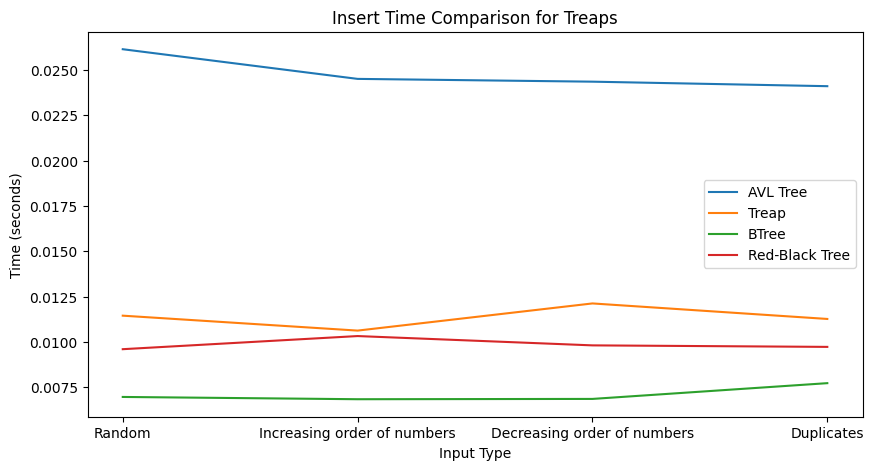

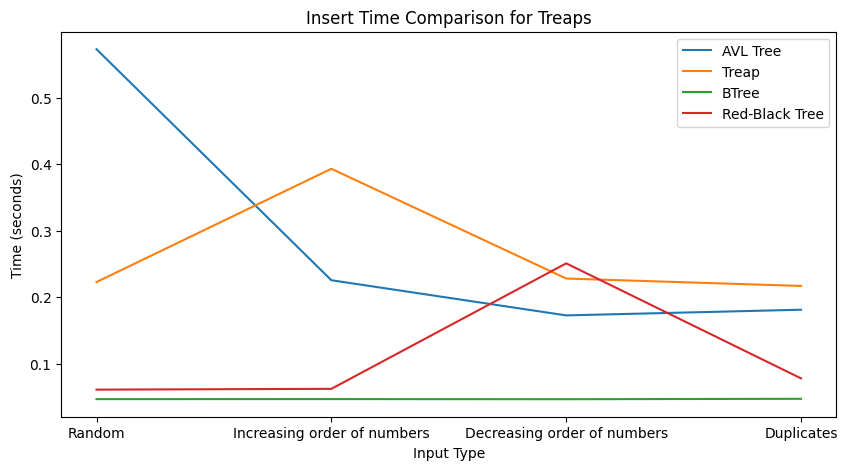

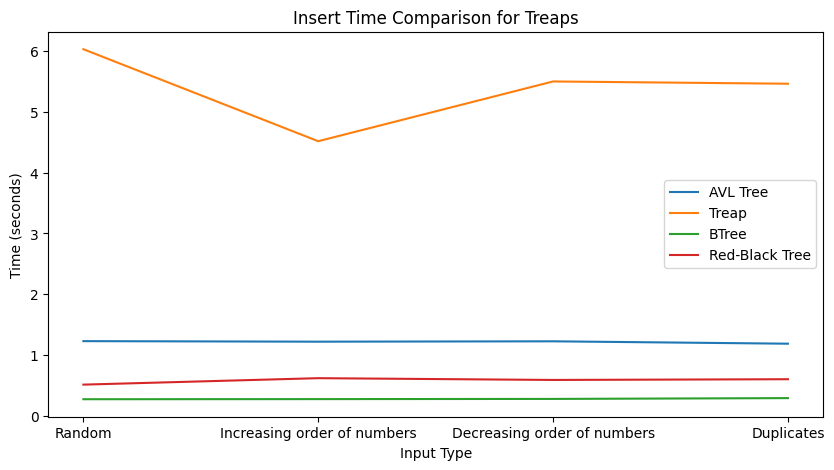

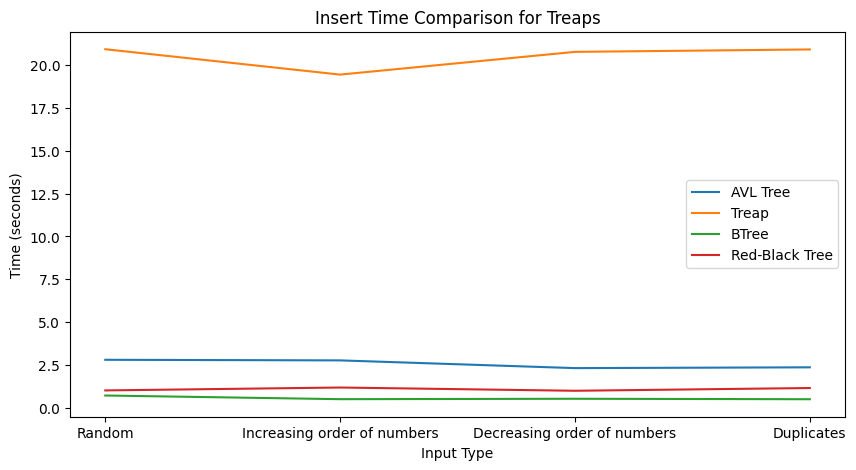

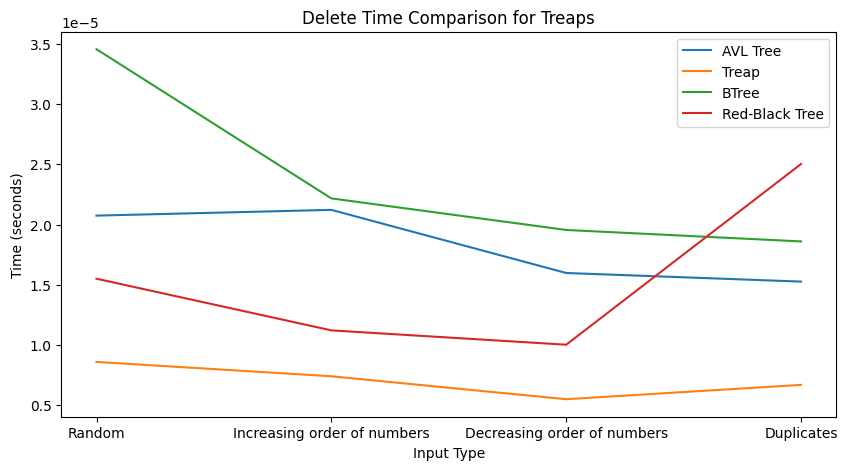

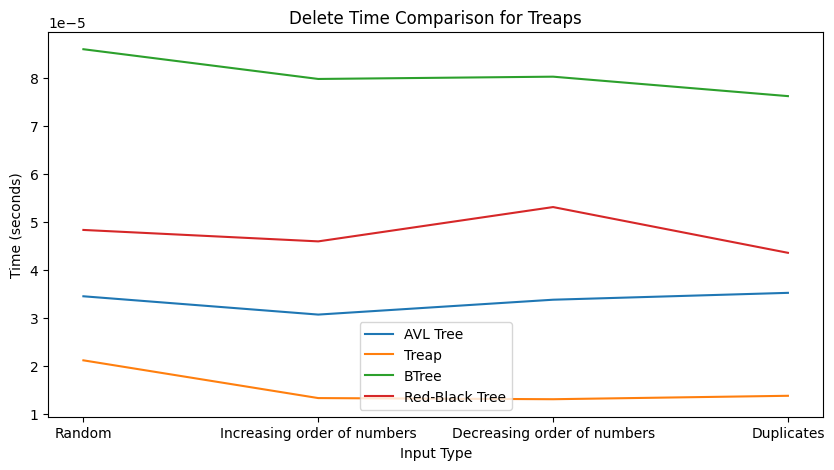

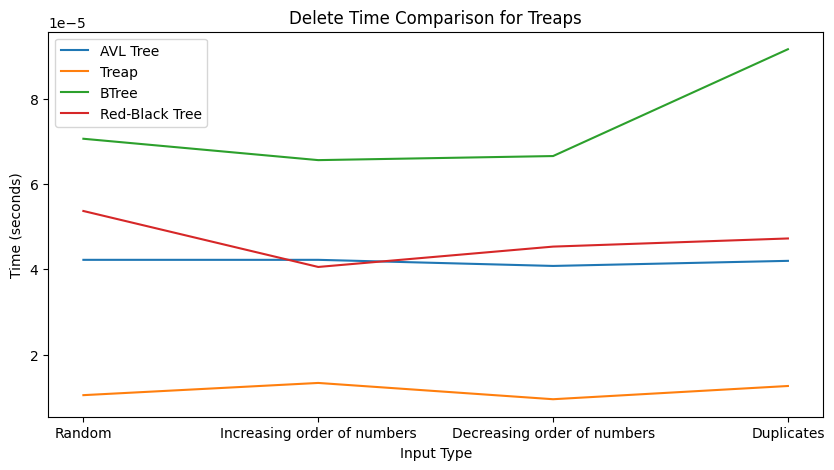

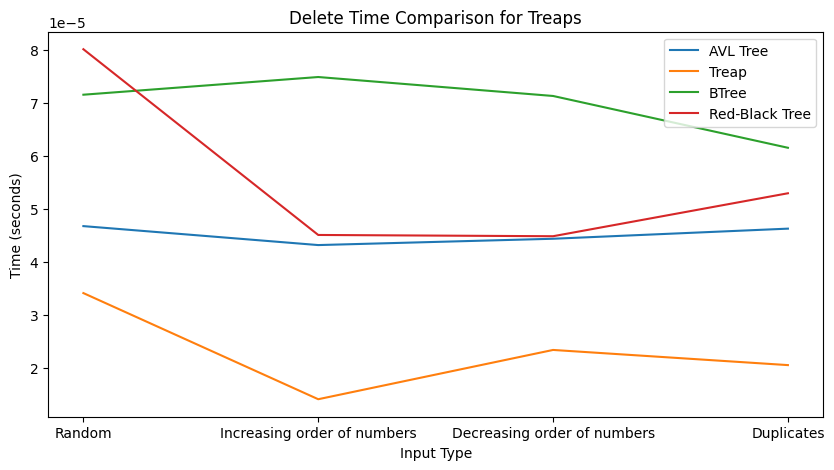

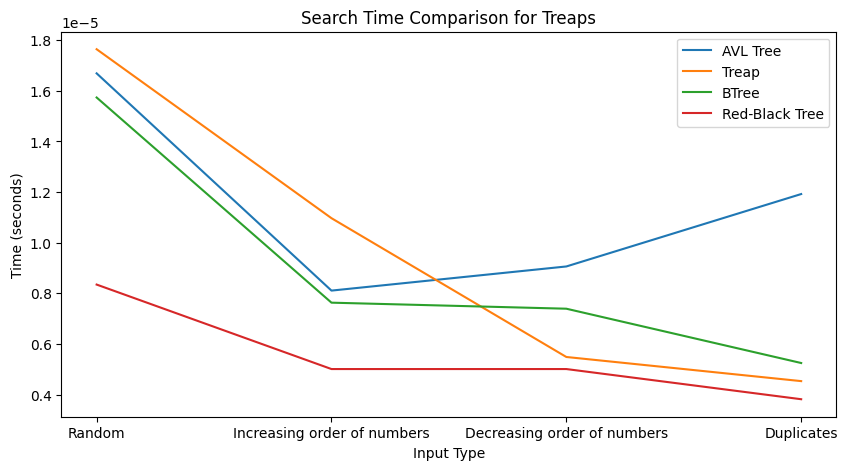

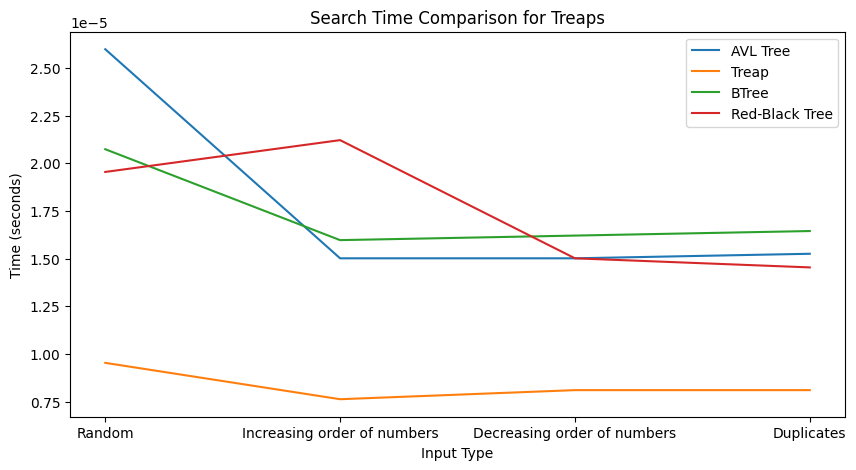

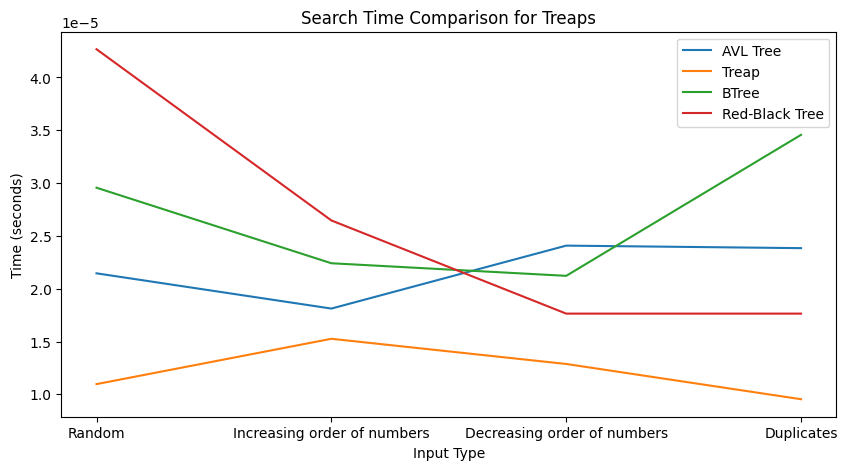

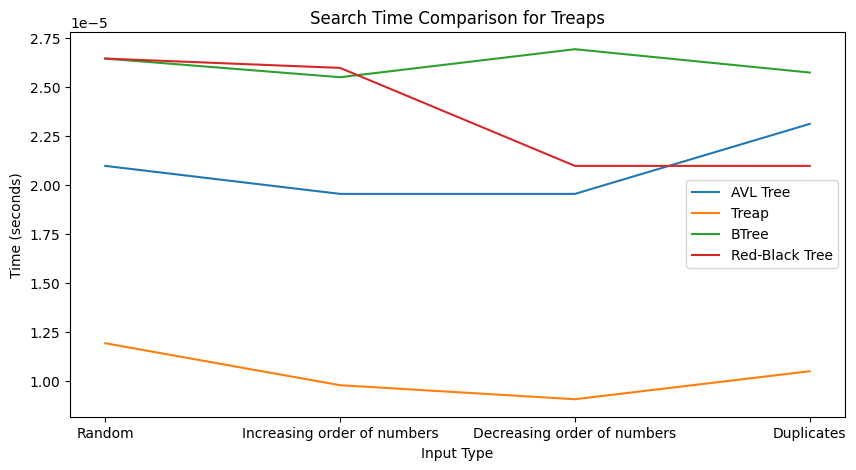

inside preorder Btree
inside preorder Btree
inside preorder Btree
inside preorder Btree


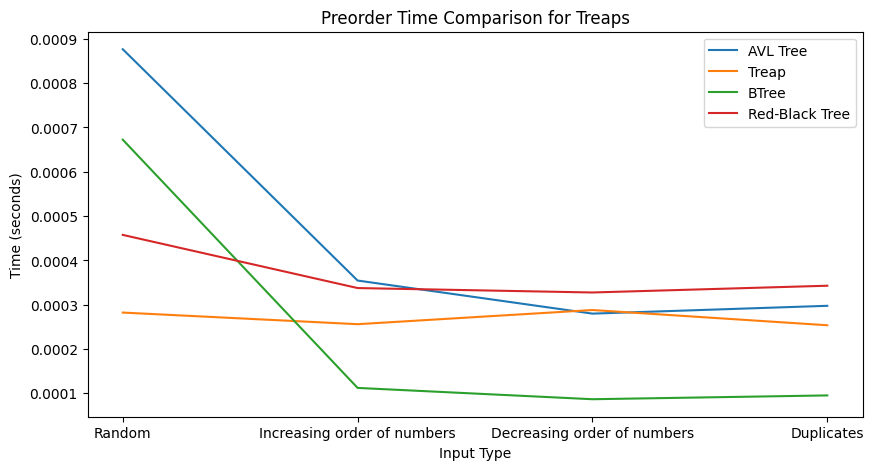

inside preorder Btree
inside preorder Btree
inside preorder Btree
inside preorder Btree


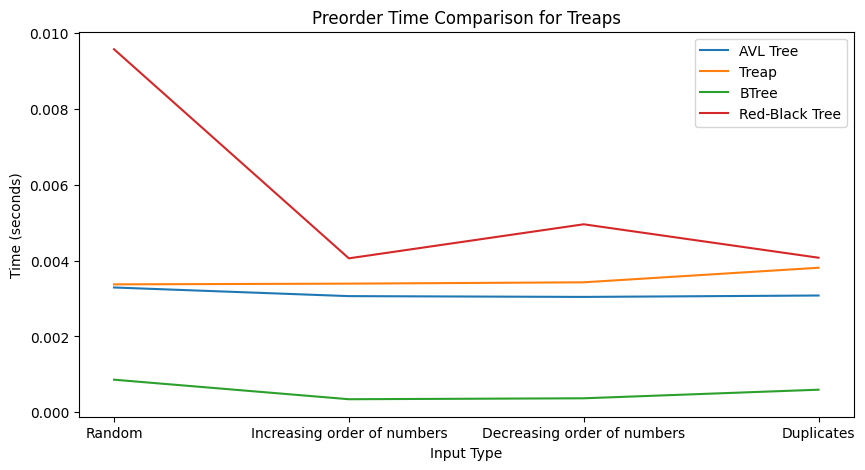

inside preorder Btree
inside preorder Btree
inside preorder Btree
inside preorder Btree


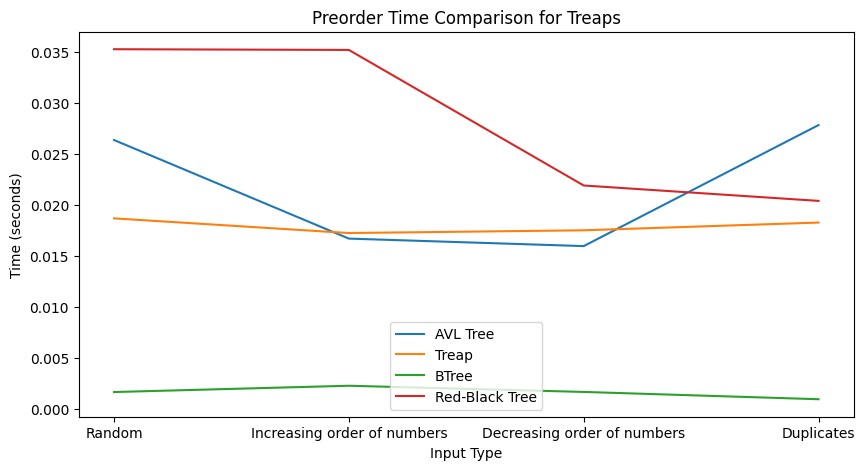

inside preorder Btree
inside preorder Btree
inside preorder Btree
inside preorder Btree


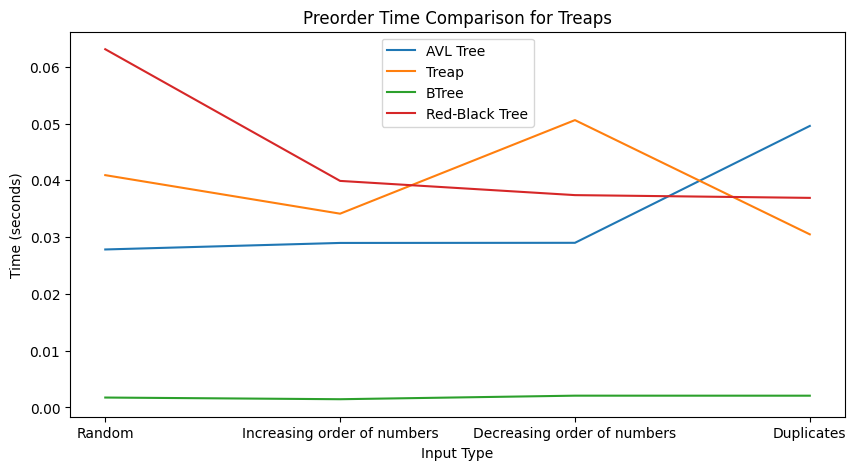

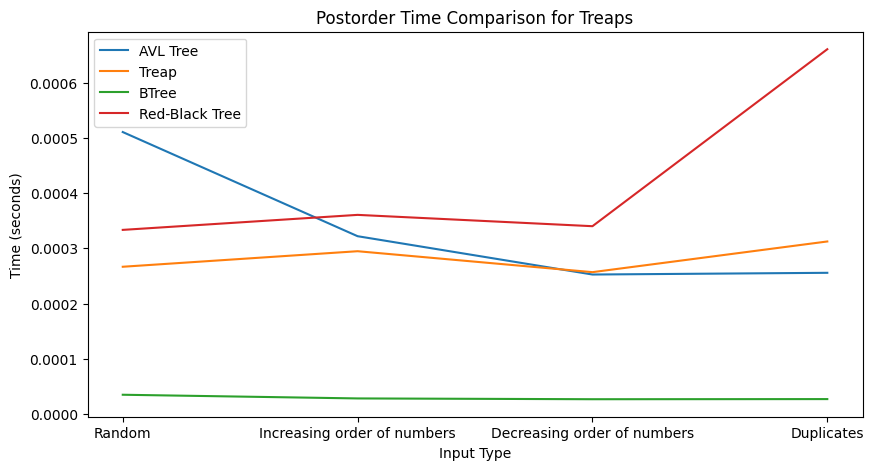

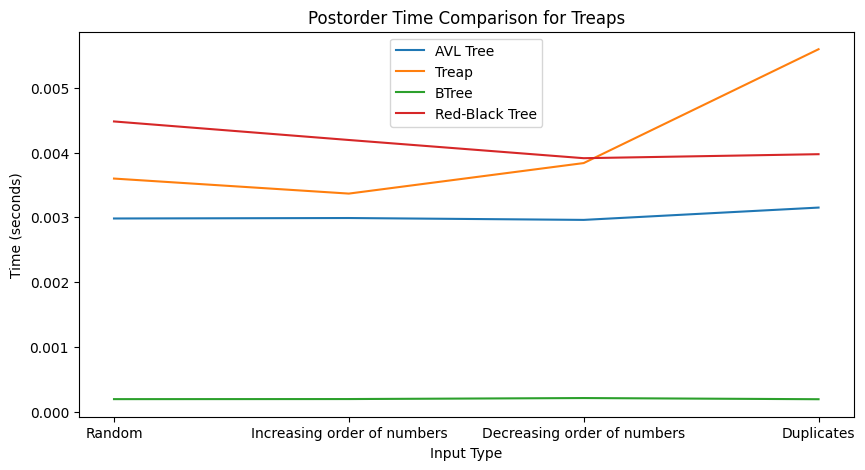

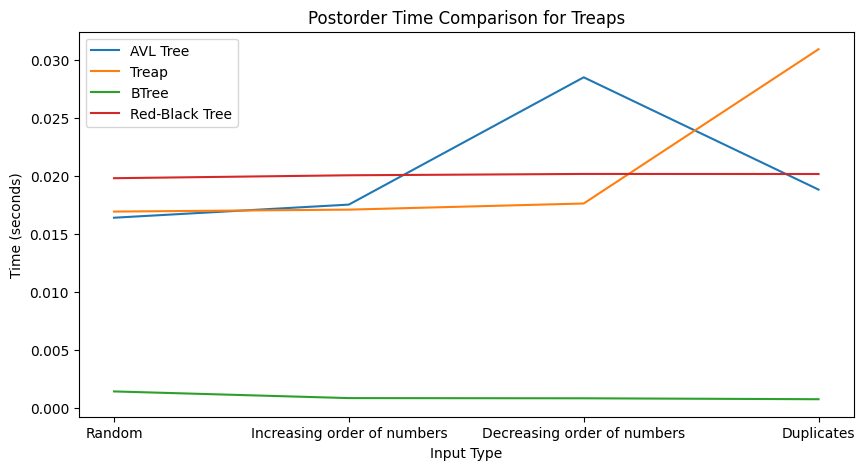

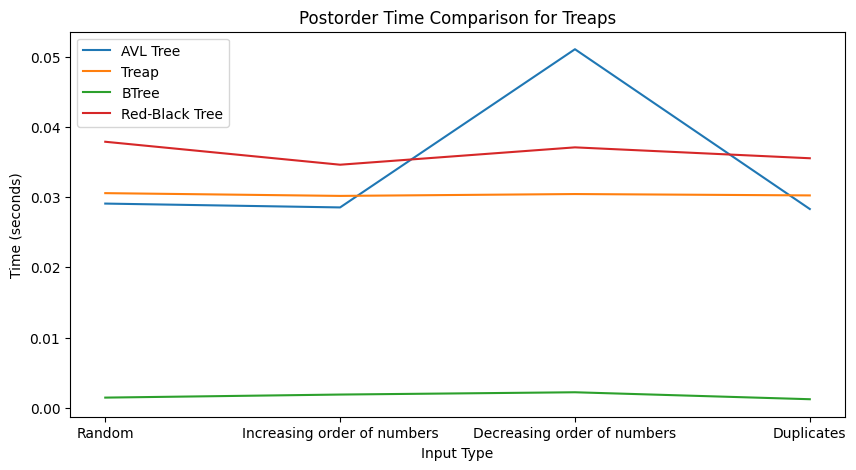

Operation: insert, Data Size: 1000
                  Random  Increasing order of numbers  \
AVL Tree        0.026145                     0.024509   
Treap           0.011445                     0.010621   
BTree           0.006961                     0.006835   
Red-Black Tree  0.009596                     0.010320   

                Decreasing order of numbers  Duplicates  
AVL Tree                           0.024355    0.024106  
Treap                              0.012120    0.011264  
BTree                              0.006852    0.007721  
Red-Black Tree                     0.009806    0.009723  


Operation: insert, Data Size: 10000
                  Random  Increasing order of numbers  \
AVL Tree        0.572963                     0.225660   
Treap           0.222954                     0.393221   
BTree           0.046897                     0.046971   
Red-Black Tree  0.061185                     0.062376   

                Decreasing order of numbers  Duplicates  
AVL Tre

In [11]:
def perform_operation_and_compare_times_treaps(operation, input_types, values):
    trees = ['AVL Tree', 'Treap', 'BTree', 'Red-Black Tree']
    tree_classes = [AVLTree, TreapTree, BTree, RedBlackTree]
    data = {tree: [] for tree in trees}

    plt.figure(figsize=(10, 5))

    for tree_index, TreeClass in enumerate(tree_classes):
        for value_index, value in enumerate(values):
            tree = TreeClass(3) if TreeClass == BTree else TreeClass()
            insert_start_time = time.time()
            for key, val in zip(range(len(value)), value):
                if TreeClass == BTree or TreeClass == RedBlackTree:
                    tree.insert(key)
                else:
                    tree.insert(key, val)
            insert_end_time = time.time()
            start = time.time()

            if operation == 'insert':
                pass  # Insert operation already done
            elif operation == 'delete':
                if TreeClass == BTree:
                    tree.delete(4)
                elif TreeClass == RedBlackTree:
                    tree.delete_node(tree.root, 4)
                else:
                    tree.delete(4)
            elif operation == 'search':
                if TreeClass == RedBlackTree:
                    tree.search(tree.root,4)
                else:
                    tree.find(4)
            elif operation == 'preorder':
                if trees[tree_index] == 'BTree':
                      print("inside preorder Btree")
                      tree.pre_order(tree.root)
                elif trees[tree_index] == 'Red-Black Tree':
                      tree.pre_order()
                elif trees[tree_index] == 'AVL Tree':
                      tree.pre_order(tree.root)
                elif trees[tree_index] == 'Treap':
                      tree.pre_order(tree.root)
            elif operation == 'postorder':
                if trees[tree_index] == 'BTree':
                      tree.post_order(tree.root)
                elif trees[tree_index] == 'Red-Black Tree':
                      tree.post_order()
                elif trees[tree_index] == 'AVL Tree':
                      tree.post_order(tree.root)
                elif trees[tree_index] == 'Treap':
                      tree.post_order(tree.root)


            if operation == 'insert':
                  time_taken =  insert_end_time- insert_start_time
            else:
                  time_taken = time.time() - start
            data[trees[tree_index]].append(time_taken)
        plt.plot(input_types, data[trees[tree_index]], label=trees[tree_index])

    plt.xlabel('Input Type')
    plt.ylabel('Time (seconds)')
    plt.title(f'{operation.capitalize()} Time Comparison for Treaps')
    plt.legend()
    plt.show()

    return data

def generate_values_and_compare_times_treaps():
    input_types = ['Random', 'Increasing order of numbers', 'Decreasing order of numbers', 'Duplicates']
    data_sizes = [1000, 10000, 50000, 89999]
    operations = ['insert', 'delete', 'search','preorder','postorder']
    #trees = ['AVL Tree', 'Treap', 'BTree', 'Red-Black Tree']
    df_dict = {}

    for operation in operations:
        for data_size in data_sizes:
            values = [
                [random.randint(1, data_size) for _ in range(data_size)],  # Random
                sorted([random.randint(1, data_size) for _ in range(data_size)]),  # Sorted
                sorted([random.randint(1, data_size) for _ in range(data_size)], reverse=True),  # Reverse Sorted
                [random.randint(1, data_size) for _ in range(10)] * (data_size // 10)  # Duplicates
            ]
            data = perform_operation_and_compare_times_treaps(operation, input_types, values)
            df = pd.DataFrame(data, index=input_types).T
            # df['Data Size'] = data_size
            df_dict[(operation, data_size)] = df

    return df_dict

df_dict = generate_values_and_compare_times_treaps()

# Print the DataFrame for each operation and data size
for key, df in df_dict.items():
    print(f"Operation: {key[0]}, Data Size: {key[1]}")
    print(df)
    print("\n")


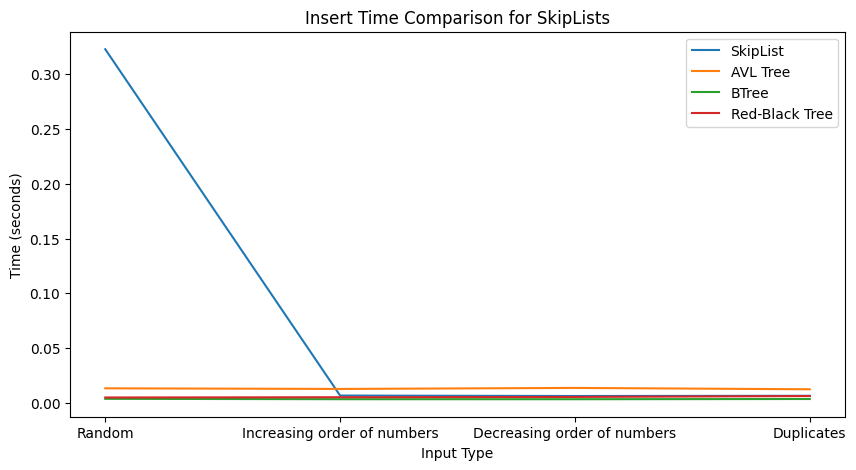

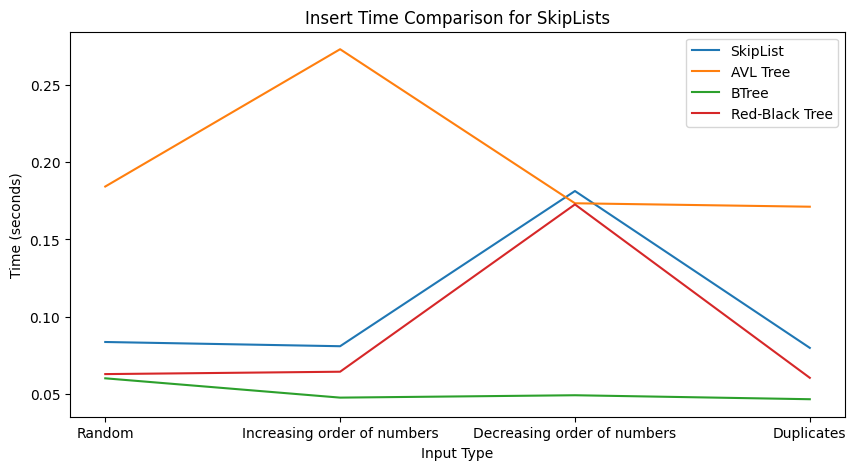

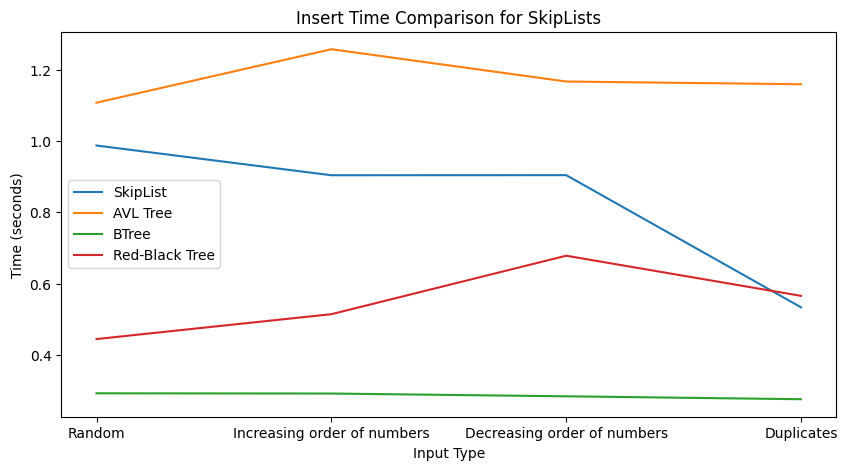

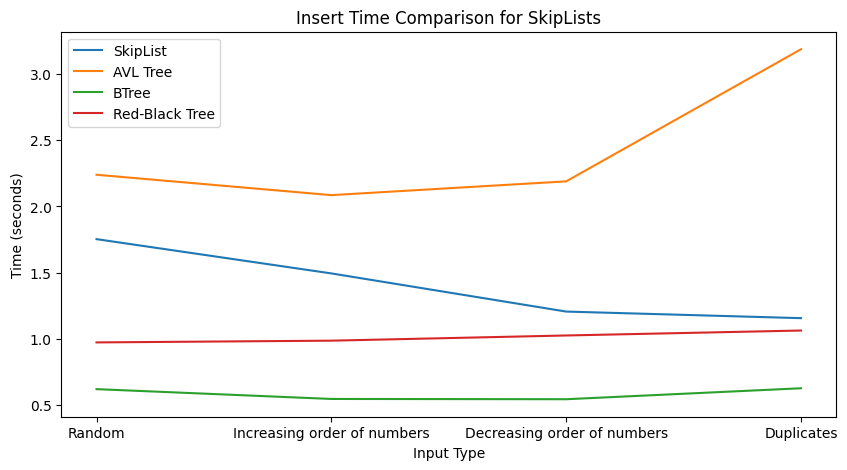

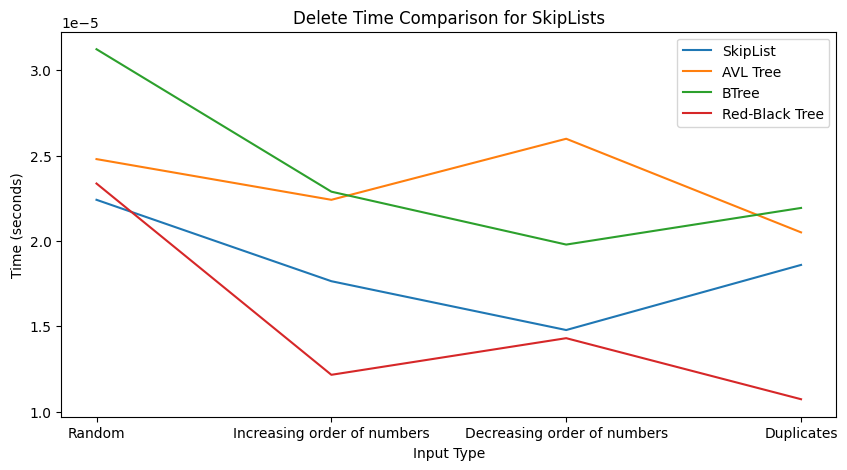

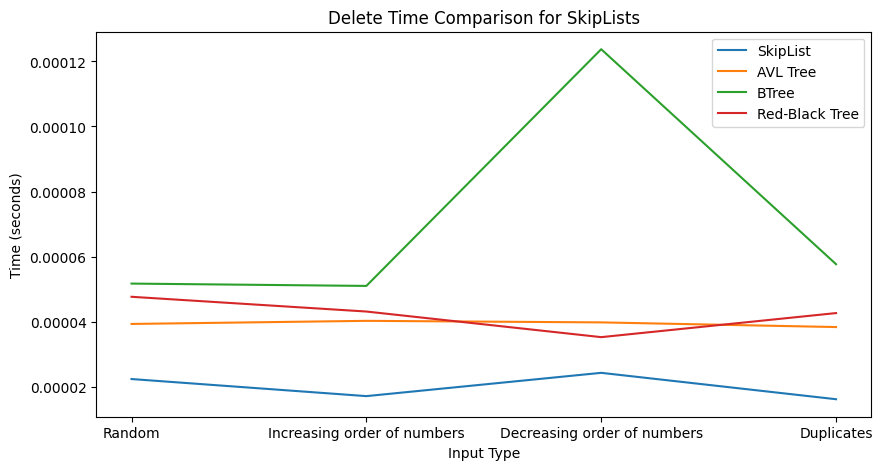

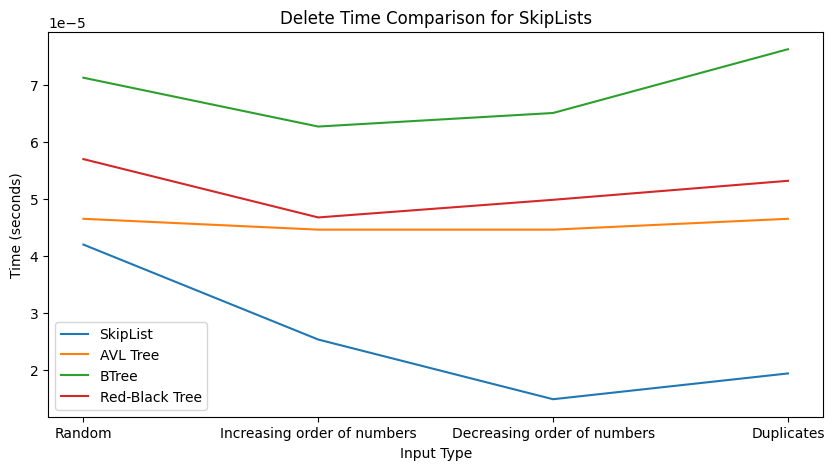

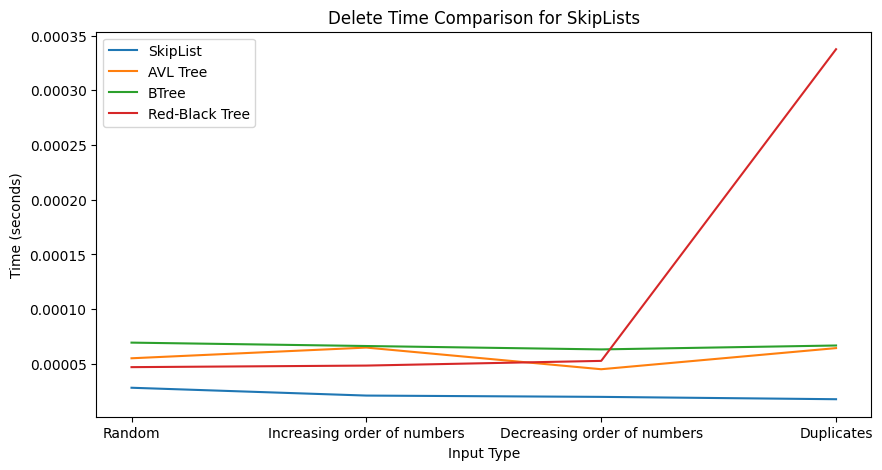

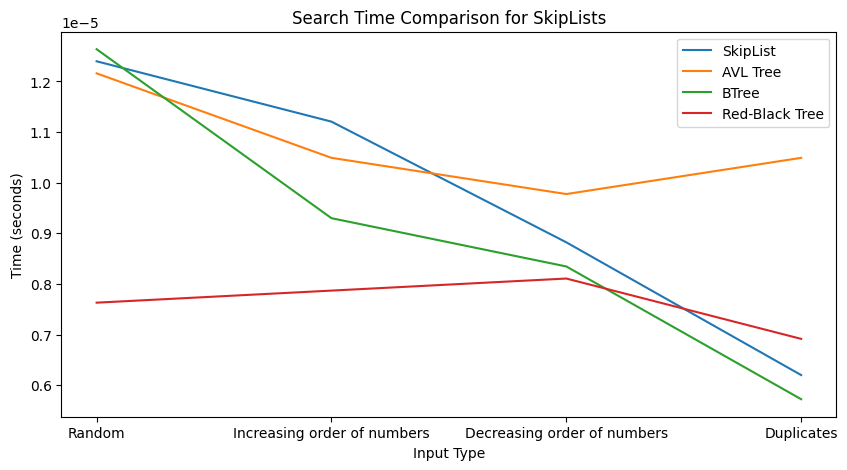

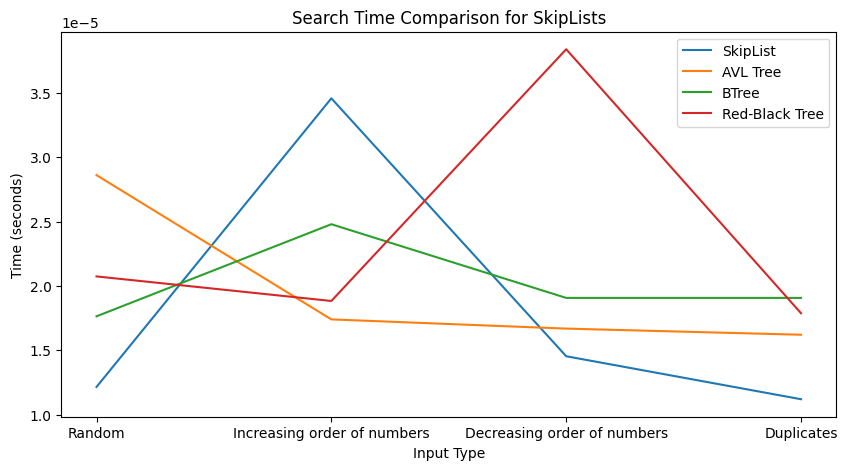

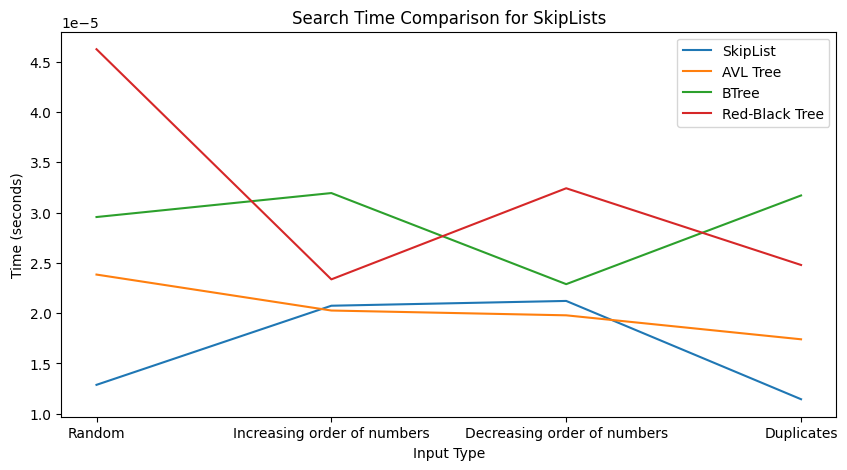

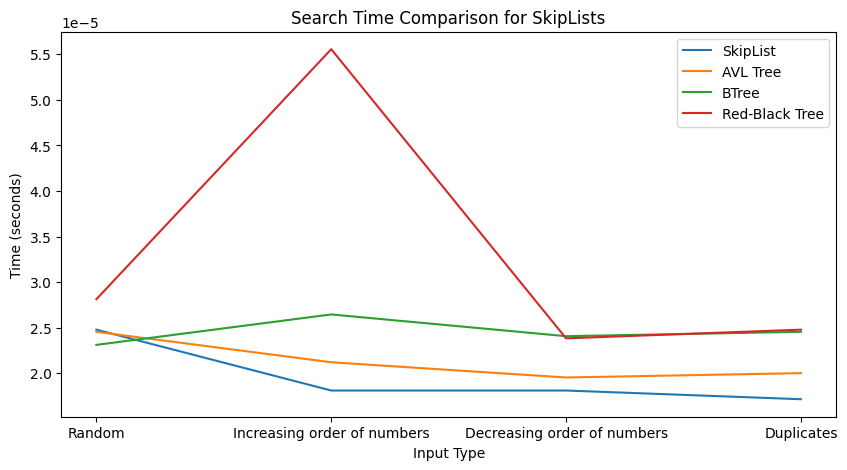

inside preorder Btree
inside preorder Btree
inside preorder Btree
inside preorder Btree


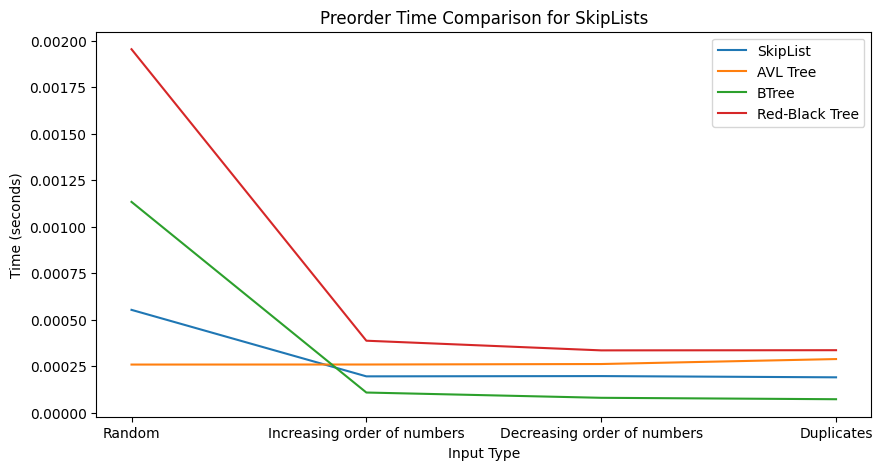

inside preorder Btree
inside preorder Btree
inside preorder Btree
inside preorder Btree


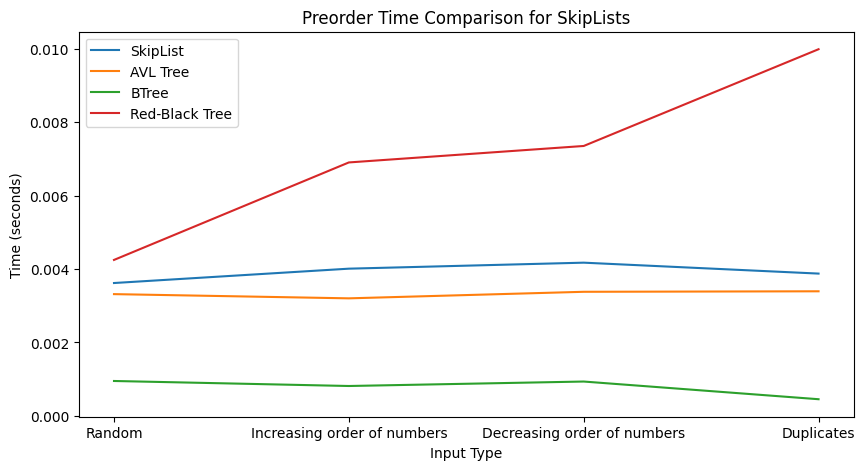

inside preorder Btree
inside preorder Btree
inside preorder Btree
inside preorder Btree


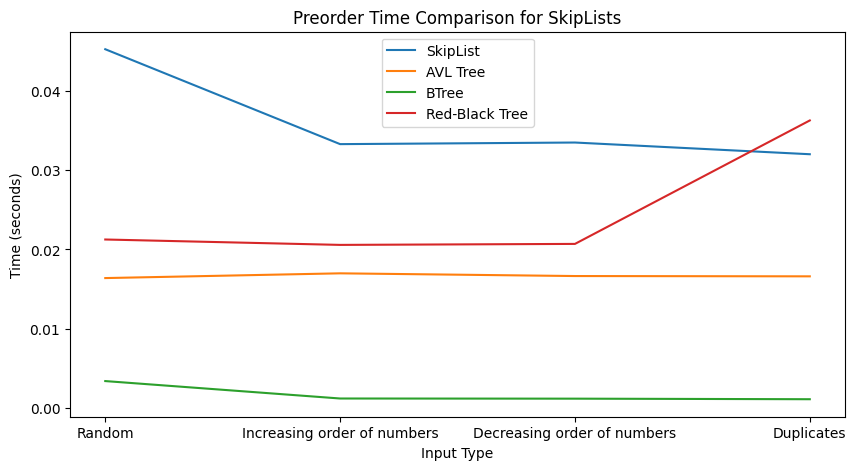

inside preorder Btree
inside preorder Btree
inside preorder Btree
inside preorder Btree


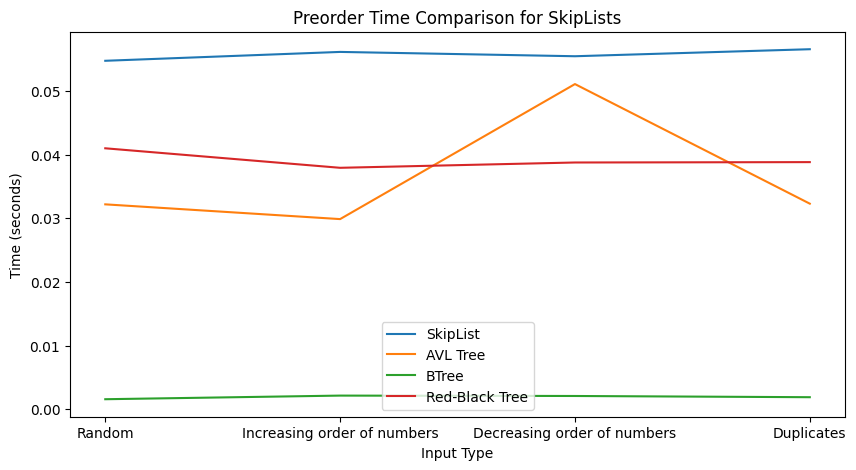

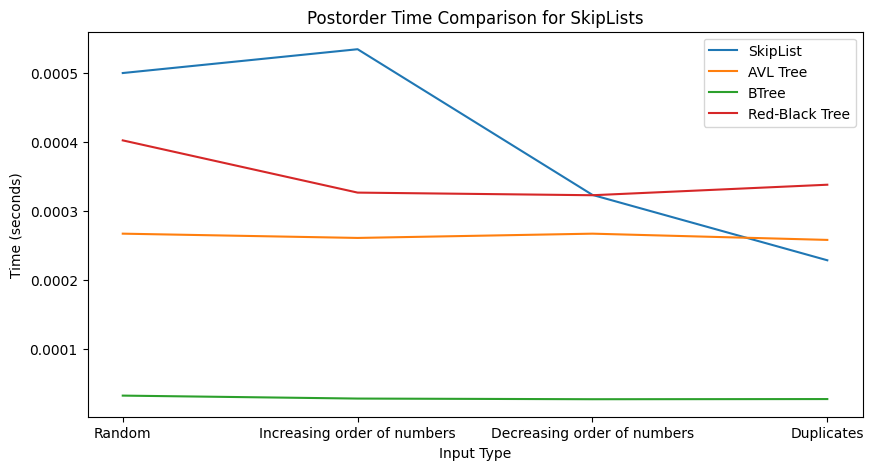

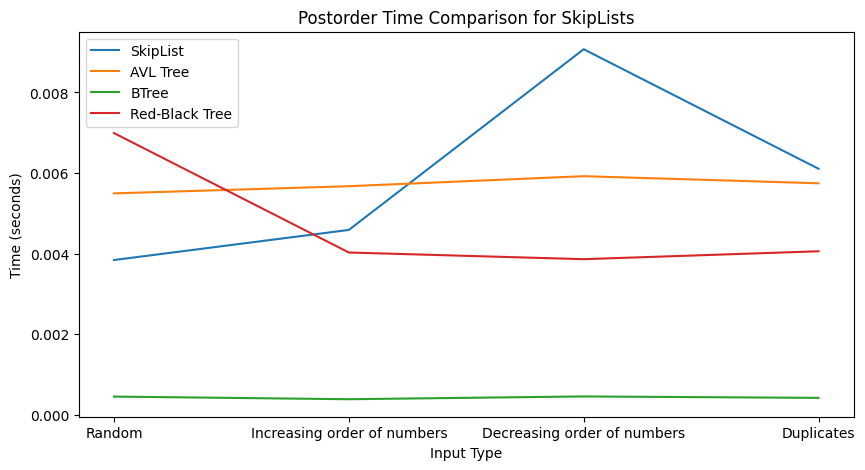

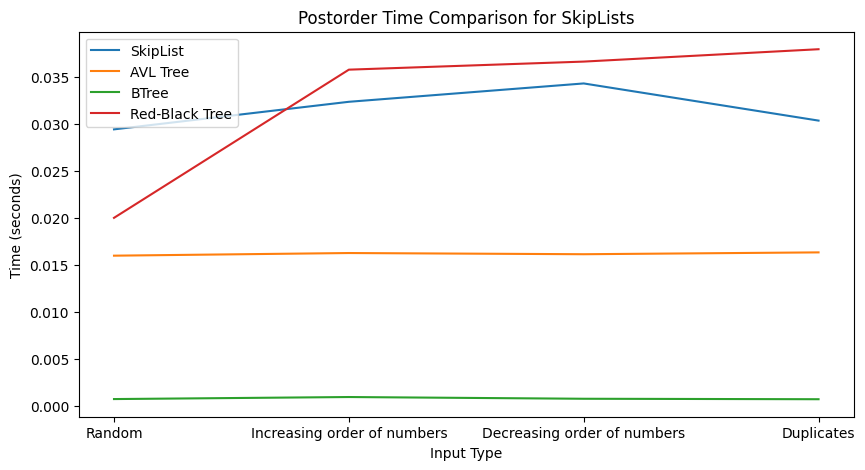

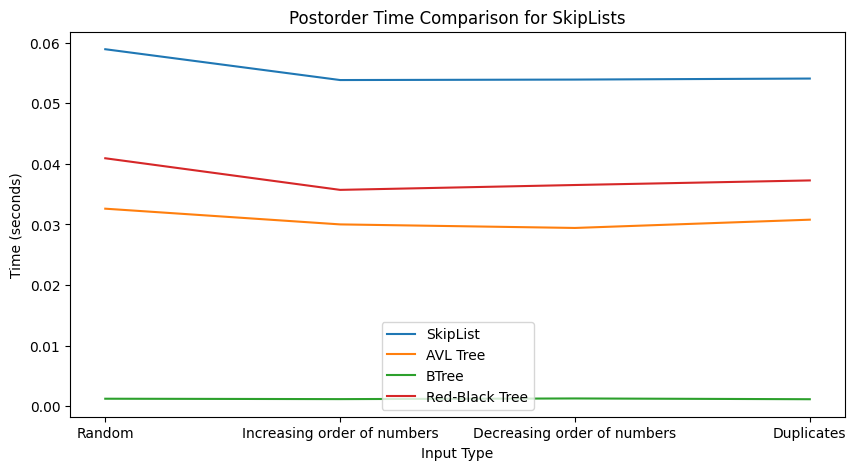

Operation: insert, Data Size: 1000
                  Random  Increasing order of numbers  \
SkipList        0.322657                     0.006814   
AVL Tree        0.013419                     0.012852   
BTree           0.003836                     0.003499   
Red-Black Tree  0.005053                     0.005284   

                Decreasing order of numbers  Duplicates  
SkipList                           0.006402    0.006595  
AVL Tree                           0.013784    0.012542  
BTree                              0.003477    0.003670  
Red-Black Tree                     0.005559    0.006372  


Operation: insert, Data Size: 10000
                  Random  Increasing order of numbers  \
SkipList        0.083638                     0.080906   
AVL Tree        0.184243                     0.273089   
BTree           0.060138                     0.047644   
Red-Black Tree  0.062867                     0.064404   

                Decreasing order of numbers  Duplicates  
SkipLis

In [15]:
def perform_operation_and_compare_times_skipLists(operation, input_types, values):
    trees = ['SkipList', 'AVL Tree', 'BTree', 'Red-Black Tree']
    tree_classes = [SkipList, AVLTree, BTree, RedBlackTree]
    data = {tree: [] for tree in trees}

    plt.figure(figsize=(10, 5))

    for tree_index, TreeClass in enumerate(tree_classes):
        for value_index, value in enumerate(values):
            tree = TreeClass(3) if TreeClass == BTree else TreeClass()
            insert_start_time = time.time()
            for key, val in zip(range(len(value)), value):
                if TreeClass == BTree or TreeClass == RedBlackTree or TreeClass == SkipList:
                    tree.insert(key)
                else:
                    tree.insert(key, val)
            insert_end_time = time.time()
            start = time.time()

            if operation == 'insert':
                pass  # Insert operation already done
            elif operation == 'delete':
                if TreeClass == BTree:
                    tree.delete(4)
                elif TreeClass == RedBlackTree:
                    tree.delete_node(tree.root, 4)
                else:
                    tree.delete(4)
            elif operation == 'search':
                if TreeClass == RedBlackTree:
                    tree.search(tree.root,4)
                else:
                    tree.find(4)
            elif operation == 'preorder':
                if trees[tree_index] == 'BTree':
                      print("inside preorder Btree")
                      tree.pre_order(tree.root)
                elif trees[tree_index] == 'Red-Black Tree':
                      tree.pre_order()
                elif trees[tree_index] == 'AVL Tree':
                      tree.pre_order(tree.root)
                elif trees[tree_index] == 'SkipList':
                      tree.pre_order()
            elif operation == 'postorder':
                if trees[tree_index] == 'BTree':
                      tree.post_order(tree.root)
                elif trees[tree_index] == 'Red-Black Tree':
                      tree.post_order()
                elif trees[tree_index] == 'AVL Tree':
                      tree.post_order(tree.root)
                elif trees[tree_index] == 'SkipList':
                      tree.post_order()


            if operation == 'insert':
                  time_taken =  insert_end_time- insert_start_time
            else:
                  time_taken = time.time() - start
            data[trees[tree_index]].append(time_taken)
        plt.plot(input_types, data[trees[tree_index]], label=trees[tree_index])

    plt.xlabel('Input Type')
    plt.ylabel('Time (seconds)')
    plt.title(f'{operation.capitalize()} Time Comparison for SkipLists')
    plt.legend()
    plt.show()

    return data

def generate_values_and_compare_times_skipLists():
    input_types = ['Random', 'Increasing order of numbers', 'Decreasing order of numbers', 'Duplicates']
    data_sizes = [1000, 10000, 50000, 89999]
    operations = ['insert', 'delete', 'search','preorder','postorder']
    #trees = ['AVL Tree', 'SkipList', 'BTree', 'Red-Black Tree']
    df_dict = {}

    for operation in operations:
        for data_size in data_sizes:
            values = [
                [random.randint(1, data_size) for _ in range(data_size)],  # Random
                sorted([random.randint(1, data_size) for _ in range(data_size)]),  # Sorted
                sorted([random.randint(1, data_size) for _ in range(data_size)], reverse=True),  # Reverse Sorted
                [random.randint(1, data_size) for _ in range(10)] * (data_size // 10)  # Duplicates
            ]
            data = perform_operation_and_compare_times_skipLists(operation, input_types, values)
            df = pd.DataFrame(data, index=input_types).T
            # df['Data Size'] = data_size
            df_dict[(operation, data_size)] = df

    return df_dict

df_dict = generate_values_and_compare_times_skipLists()

# Print the DataFrame for each operation and data size
for key, df in df_dict.items():
    print(f"Operation: {key[0]}, Data Size: {key[1]}")
    print(df)
    print("\n")
